In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline



In [4]:
def funcM(x,t):
    ret=sum(x[0:512])+sum(x[t:512+t])
    return ret


In [ ]:
data=np.loadtxt('teraterm.log', delimiter=',')
L=len(data)
wx=data[L/3:L/3+1024]
plt.plot(wx)
plt.show()
#np.savetxt('x500Hz.dat', wx)

[-0.35351562 -0.38671875 -0.39648438 -0.38867188 -0.35742188 -0.3046875
 -0.23828125 -0.16015625 -0.07617188  0.0078125 ]
[ -7.68661499e-04 +0.00000000e+00j  -1.45388531e-04 -7.11087169e-04j
  -1.78984763e-03 -1.19687317e-04j  -2.29029166e-04 -5.00475519e-04j
  -2.06335340e-03 -4.82210076e-05j  -6.74555135e-05 -3.42813816e-04j
  -2.22492006e-03 -1.08739225e-04j   2.22288868e-04 -1.16674333e-04j
  -2.15410815e-03 -5.16909350e-04j   1.42375682e-04 -1.03306918e-04j]


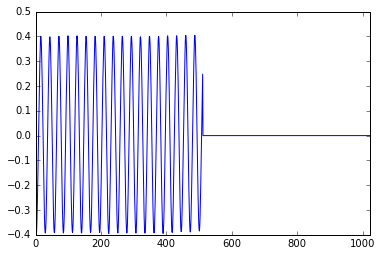

In [19]:
adc_in=np.loadtxt('x500Hz.dat', delimiter=',')
x=(adc_in-512)/512
print(x[0:10])
x[512:1024] = np.zeros(512)
plt.plot(x)
plt.xlim([0,1024])
F=np.fft.fft(x,1024)/1024
print(F[0:10])

39.024181366
78.0483627319


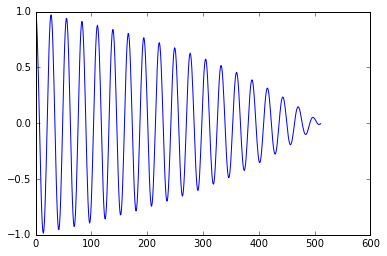

In [14]:
# smarter way paper
F=np.fft.fft(x)
ps=np.real(F*np.conjugate(F))
r=np.real(np.fft.ifft(ps))
x2=x*x
m=np.zeros(512)
for i in np.arange(512):
    m[i]=funcM(x2,i)
print(r[0])
print(m[0])
r=r[0:512]
nsdf=2*r/m
plt.plot(nsdf)

-- fft --
[ -7.68661499e-04 +0.00000000e+00j  -1.45388531e-04 -7.11087169e-04j
  -1.78984763e-03 -1.19687317e-04j  -2.29029166e-04 -5.00475519e-04j
  -2.06335340e-03 -4.82210076e-05j  -6.74555135e-05 -3.42813816e-04j
  -2.22492006e-03 -1.08739225e-04j   2.22288868e-04 -1.16674333e-04j
  -2.15410815e-03 -5.16909350e-04j   1.42375682e-04 -1.03306918e-04j]
-- ps --
[  2.95420250e-07   2.63391393e-07   1.60893979e-06   1.51465052e-07
   2.12987626e-06   6.10357793e-08   2.48104675e-06   3.15126204e-08
   2.45368859e-06   1.54715771e-08]
-- ifft --
[ 0.01554256 +3.59248908e-17j  0.01310050 +3.40897409e-17j
  0.01000065 +7.15573434e-18j  0.00640549 +7.25459413e-18j
  0.00250159 +3.45076385e-18j -0.00151217 -1.89601383e-18j
 -0.00543150 -6.85784271e-18j -0.00905799 -1.30548784e-17j
 -0.01220868 -2.36046587e-17j -0.01472557 -3.40688582e-17j]
-- m --
[ 0.0762191   0.07609706  0.07595101  0.0757975   0.07564997  0.07552522
  0.07543456  0.07537911  0.07535406  0.0753484 ]


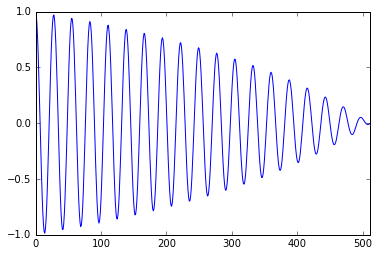

In [13]:
# overflow considering
F=np.fft.fft(x)/1024             #avoid overflow here
print("-- fft --")
print(F[0:10])
ps=np.real(F*np.conjugate(F)/2)  #avoid overflow here
print("-- ps --")
print(ps[0:10])
#plt.plot(ps[30:40])
ifftps=np.fft.ifft(ps)*1024           #avoid overflow here(not *1024)
print("-- ifft --")
print(ifftps[30:40])
r=np.real(ifftps)
#plt.plot(r)
x2=x*x/1024                       #avoid overflow
m=np.zeros(512)
for i in np.arange(512):
    m[i]=funcM(x2,i)
print("-- m --")
print(m[0:10])
#plt.plot(m)
r=r[0:512]
nsdf=2*2*r/m                #avoid overflow here
plt.plot(nsdf)
plt.xlim([0,512])
plt.show()

In [30]:
samplerates=np.array([2.368, 2.368, 2.377, 2.362])
sr=np.average(samplerates)
T=sr/(32)
#74.02ms for N=1024 sampling
print(T)
keyMax=T/1024*28
print(keyMax)
freq=1/keyMax
print(freq)

0.0740234375
0.00202407836914
494.052016585


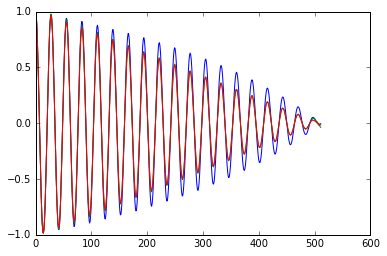

In [15]:
nsdf_q0114=np.loadtxt('nsdf_Q1.14.dat', delimiter=',')
nsdf_q1516=np.loadtxt('nsdf_Q15.16.dat', delimiter=',')
plt.plot(nsdf)
plt.plot(nsdf_q1516)
plt.plot(nsdf_q0114)
plt.show()